## Customer churn prediction using ANN

Customer churn is a measure of how many customers are leaving the business. This model could be useful to understand why customers are leaving the business and help taking actions to prevent customers from leaving the business.

This concept could be applied to pretty much any business.

In [2]:
# import useful libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
# import csv dataset into dataframe
df=pd.read_csv('Telco_customer_churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Exploratory data analysis

In [4]:
#customerID doesn't tell us anything useful so we'll drop this column from our dataframe right away
df=df.drop('customerID', axis='columns')

In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

You can see that 'TotalCharges' column is object type which means it is column of strings (in opposite to 'MonthlyCharges' column which is float64 type). Let's look into 'TotalCharges' column.

In [6]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
# convert 'TotalCharges' column to a numeric type
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [8]:
df.TotalCharges.isnull().value_counts()

False    7032
True       11
Name: TotalCharges, dtype: int64

In [9]:
#drop null values
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df.shape

(7032, 20)

In [12]:
# check 'TotalCharges' data type
df.TotalCharges.dtype

dtype('float64')

We converted 'TotalCharges' column into float64 type and droped 11 missing values from dataframe.

#### 'tenure' column 

We want to see how many loyal customers (customer with long tenure is considered as loyal) are leaving the business. Data visualization will help us to understand this.

In [13]:
# tenure of customers which are not leaving the business
tenure_churn_no=df[df.Churn=='No'].tenure

In [14]:
# tenure of customers which are leaving the business
tenure_churn_yes=df[df.Churn=='Yes'].tenure

Text(0, 0.5, 'Number of customers')

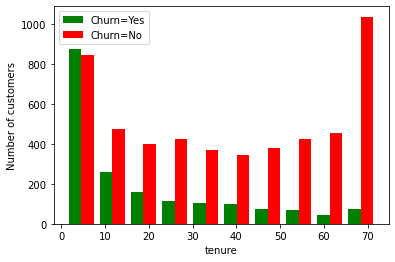

In [15]:
# plot histogram
plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

plt.xlabel('tenure')
plt.ylabel('Number of customers')

#### 'MonthlyCharges' column

We want to understand how monthly charges are affecting customer churn.

In [16]:
# monthly charges of customers which are not leaving the business
mc_churn_no=df[df.Churn=='No'].MonthlyCharges

In [17]:
# monthly charges of customers which are leaving the business
mc_churn_yes=df[df.Churn=='Yes'].MonthlyCharges

Text(0, 0.5, 'Number of customers')

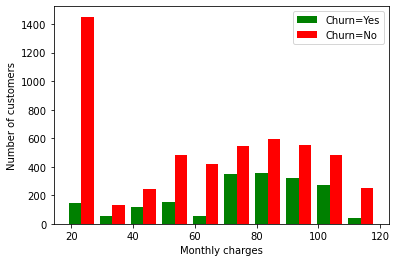

In [18]:
# plot histogram 
plt.hist([mc_churn_yes, mc_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

plt.xlabel('Monthly charges')
plt.ylabel('Number of customers')

#### Discover categorical columns

In [19]:
# define a function to discover columns with categorical varibales

def discover_categorical_columns(df):
    """
    This function takes dataframe as an input, goes through columns in a dataframe to check if column is of an object type.
    If the colunm is of an object type it means column contains categorical variables. Function than prints all unique 
    categorical values of a column
    
    Args: 
        df (pd.DataFrame) - only requried argument for the function
        
    Returns:
        Prints unique categorical values for object type columns.
    """
    for column in df:
        if df[column].dtype=='object':
            print('{} : {}'.format(column, df[column].unique()))

In [20]:
discover_categorical_columns(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Some columns could be simplified. 'No internet service' and 'No phone service' values should be treated as 'No' values, so we will fix that with pd.replace() method.

In [21]:
# replace 'No phone service' with 'No'
df.replace(to_replace='No phone service', value='No', inplace=True)

In [22]:
# replace 'No internet service' with 'No'
df.replace(to_replace='No internet service', value='No', inplace=True)

In [23]:
# check values
discover_categorical_columns(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Next, we want to convert 'Yes' and 'No' values in columns with 1's and 0's.

In [24]:
# replace 'Yes' with 1; replace 'No' with 0
df.replace({'Yes':1, 'No':0}, value=None, inplace=True)

In [25]:
discover_categorical_columns(df)

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 0]
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


We can also replace 'Female' and 'Male' categorical values of 'gender' column to 1's and 0's. 

In [26]:
# replace 'Female' with 1; replace 'Male' with 0
df.replace({'Female':1, 'Male':0}, value=None, inplace=True)

In [27]:
df.gender.unique()

array([1, 0], dtype=int64)

We have 3 categorical columns left to take care of: 'InternetService', 'Contract' and 'PaymentMethod'. Those columns have more than 2 category values so we'll use  pd.get_dummies() to encode those columns.  

In [28]:
# dataframe with dummy variables
df=pd.get_dummies(data=df, columns=['InternetService', 'Contract', 'PaymentMethod'])

In [29]:
# random sample from dataframeto check 
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1152,0,0,0,0,7,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1589,1,1,0,0,7,1,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
3743,0,0,0,1,4,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
5917,0,0,0,0,4,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2555,1,0,0,0,8,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0


In [30]:
# check datatypes
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

All columns are now integer or float columns.

#### Scaling the data

'tenure', 'MonthlyCharges' and 'TotalCharges' are not in range 0-1 so we have to scale the data in these columns.

In [31]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [32]:
# initialize MinMaxScaler object
scaler = MinMaxScaler()

In [33]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [34]:
# scale selected columns
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [35]:
# check scaled columns
df[cols_to_scale].head()

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330


### Creating a model

In [36]:
# separating features and target variable
X = df.drop(columns='Churn', axis ='columns')
y = df.Churn

#### Train-test split

We will split our data into train set and test set in 80:20 ratio.

In [37]:
from sklearn.model_selection import train_test_split

#create train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

In [38]:
# import tensorflow libraries
import tensorflow as tf
from tensorflow import keras

In [39]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50)

Epoch 1/50
176/176 [==============================] - 0s 1ms/step - loss: 0.5547 - accuracy: 0.6962
Epoch 2/50
176/176 [==============================] - 0s 958us/step - loss: 0.4382 - accuracy: 0.7925
Epoch 3/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4264 - accuracy: 0.7968
Epoch 4/50
176/176 [==============================] - 0s 952us/step - loss: 0.4221 - accuracy: 0.8004
Epoch 5/50
176/176 [==============================] - 0s 963us/step - loss: 0.4186 - accuracy: 0.8018
Epoch 6/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4173 - accuracy: 0.8048
Epoch 7/50
176/176 [==============================] - 0s 963us/step - loss: 0.4157 - accuracy: 0.8052
Epoch 8/50
176/176 [==============================] - 0s 958us/step - loss: 0.4131 - accuracy: 0.8068
Epoch 9/50
176/176 [==============================] - 0s 958us/step - loss: 0.4119 - accuracy: 0.8082
Epoch 10/50
176/176 [==============================] - 0s 986us/step - loss: 0.4107 - ac

In [40]:
# evaluate the model on the test set
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 816us/step - loss: 0.4352 - accuracy: 0.7811


[0.4352074861526489, 0.7810945510864258]

In [41]:
# predict
y_predicted = model.predict(X_test)

y_predicted[:5]

array([[0.0020121 ],
       [0.8443139 ],
       [0.04309684],
       [0.7254727 ],
       [0.7505445 ]], dtype=float32)

In [42]:
# convert predictions to 1 or 0 and append it to a list 
y_pred = []

for el in y_predicted:
    if el >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [43]:
# first 10 predictions
y_pred[:10]

[0, 1, 0, 1, 1, 1, 0, 0, 0, 1]

In [44]:
# first 10 churn values
y_test[:10]

1778    0
5036    1
1106    0
1665    0
927     1
4648    0
6905    0
5198    1
3404    0
407     0
Name: Churn, dtype: int64

#### Classification report

Classification report will print statistics on precision and recall.

In [45]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1041
           1       0.59      0.54      0.56       366

    accuracy                           0.78      1407
   macro avg       0.71      0.70      0.71      1407
weighted avg       0.78      0.78      0.78      1407



#### Confusion matrix

In predictive analytics, a table of confusion (sometimes also called a confusion matrix) is a table with two rows and two columns that reports the number of false positives, false negatives, true positives, and true negatives. This allows more detailed analysis than mere proportion of correct classifications (accuracy).

All numbers in confusion matrix which are not placed on the diagonal are errors (wrong predictions).

Text(69.0, 0.5, 'Truth')

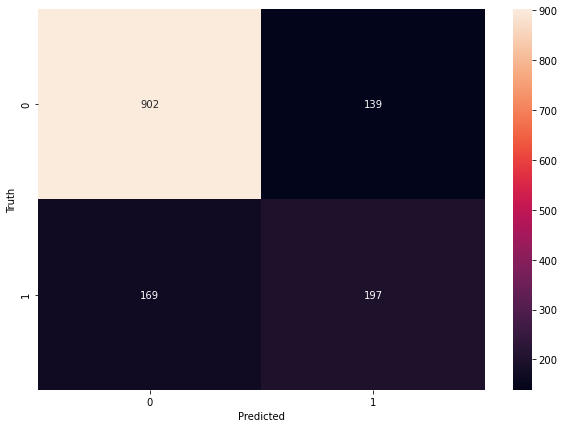

In [46]:
import seaborn as sn
conf_matrix = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Handling imbalanced dataset



We got pretty good accuracy score around 0.8 but we didn't take into account unbalanced classes in our dataset. Using simpler metrics like accuracy_score can be misleading. In a dataset with highly unbalanced classes, if the classifier always "predicts" the most common class without performing any analysis of the features, it will still have a high accuracy rate, so high accuracy could be just an illusion.

In [48]:
y_train.value_counts()

0    4122
1    1503
Name: Churn, dtype: int64

We can see from value counts above that our training dataset has highly unbalanced classes. We'll try to deal with this issue by over-sampling minority class (in our case 1) using **SMOTE** technique.

**SMOTE (Synthetic Minority Oversampling TEchnique)** consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

<img src='https://data-bunseki.com/wp-content/uploads/2019/11/smote.png'/>

In [50]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')      
X_sm, y_sm = smote.fit_sample(X, y)

In [51]:
# check value counts
y_sm.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

Our dataset now has balanced classes. Let's train the model and see if we improved.

In [52]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [53]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [54]:
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
259/259 [==============================] - 0s 1ms/step - loss: 0.4399 - accuracy: 0.7900
Epoch 2/50
259/259 [==============================] - 0s 973us/step - loss: 0.4288 - accuracy: 0.7978
Epoch 3/50
259/259 [==============================] - 0s 959us/step - loss: 0.4217 - accuracy: 0.8021
Epoch 4/50
259/259 [==============================] - 0s 1ms/step - loss: 0.4181 - accuracy: 0.8038
Epoch 5/50
259/259 [==============================] - 0s 994us/step - loss: 0.4159 - accuracy: 0.8075
Epoch 6/50
259/259 [==============================] - 0s 959us/step - loss: 0.4132 - accuracy: 0.8093
Epoch 7/50
259/259 [==============================] - 0s 972us/step - loss: 0.4097 - accuracy: 0.8096
Epoch 8/50
259/259 [==============================] - 0s 976us/step - loss: 0.4063 - accuracy: 0.8139
Epoch 9/50
259/259 [==============================] - 0s 974us/step - loss: 0.4055 - accuracy: 0.8121
Epoch 10/50
259/259 [==============================] - 0s 960us/step - loss: 0.4022 - 

In [55]:
# evaluate the model on the test set
model.evaluate(X_test, y_test)

65/65 [==============================] - 0s 889us/step - loss: 0.4362 - accuracy: 0.8011


[0.43623995780944824, 0.8010648488998413]

In [56]:
# predict
y_predicted = model.predict(X_test)

y_predicted[:5]

array([[0.8372922 ],
       [0.00664702],
       [0.964729  ],
       [0.9072792 ],
       [0.00642177]], dtype=float32)

In [57]:
# convert predictions to 1 or 0 and append it to a list 
y_pred = []

for el in y_predicted:
    if el >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [58]:
# classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79      1033
           1       0.77      0.86      0.81      1033

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



Text(69.0, 0.5, 'Truth')

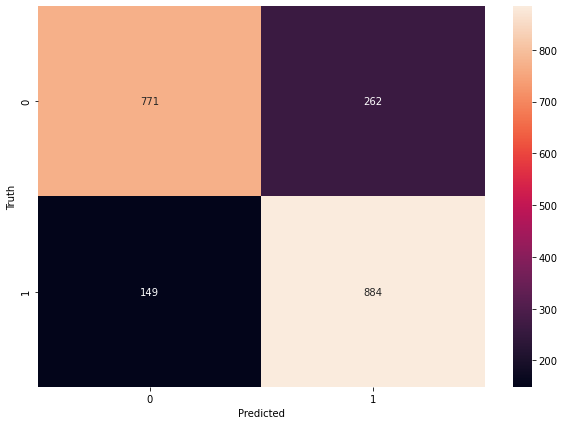

In [59]:
# confusion matrix
conf_matrix = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

If you take a look at classification report you can notice that f1-score for minority class 1 improved from 0.56 to 0.81. Score for class 0 reduced from 0.85 to 0.79 but that is ok because we now have more generalized classifier which classifies both classes with similar prediction score.